<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml09_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# 2진 분류(binary-class classification) 문제

*   breast cancer 데이터에서 Malignant/Benign 분류
*   KNN classifier
*   Logistic regression
*   SGD classifier

## 데이터 셋 준비

In [2]:
bc = datasets.load_breast_cancer()

In [3]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
x = bc.data  # 특성 배열(2d array)
y = bc.target  # 타겟 배열(1d array)

In [5]:
x.shape

(569, 30)

In [6]:
y.shape

(569,)

In [7]:
pd.Series(y).value_counts()  # 0 - Malignant(암), 1 - Benign(음성)

,count
1,357
0,212


TODO: 탐색적 데이터 분석(데이터 시각화: 빈도 막대 그래프, 히스토그램, 산점도 pairplot)

## 훈련 셋, 테스트 셋 나누기

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

## KNN

In [10]:
# ML 모델
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('knn', KNeighborsClassifier())])

In [11]:
# ML 모델 훈련
pipe.fit(X=x_train, y=y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [13]:
train_pred = pipe.predict(X=x_train)  # 훈련 셋 예측값

In [14]:
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[161,   9],
       [  3, 282]])

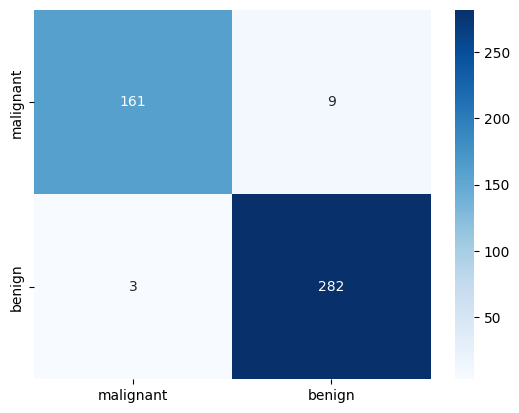

In [17]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=bc.target_names, yticklabels=bc.target_names)
plt.show()

In [19]:
print(classification_report(y_true=y_train, y_pred=train_pred, target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96       170
      benign       0.97      0.99      0.98       285

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [20]:
test_pred = pipe.predict(X=x_test)  # 테스트 셋 예측값

In [21]:
print(classification_report(y_true=y_test, y_pred=test_pred,
                            target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Logistic Regression

In [26]:
# Logistic Regression ML 모델 생성
logit = LogisticRegression(random_state=42, max_iter=10_000)

In [27]:
# ML 모델 훈련
logit.fit(X=x_train, y=y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [28]:
logit.coef_

array([[ 0.80708196,  0.11328911, -0.28307687,  0.02521483, -0.16733751,
        -0.20217576, -0.45506264, -0.25243782, -0.30921281, -0.03116865,
        -0.05511739,  1.10334223,  0.08564572, -0.09595851, -0.02231761,
         0.05911651, -0.02139347, -0.03540418, -0.04039299,  0.0137089 ,
         0.09521451, -0.37693116, -0.08781235, -0.01459524, -0.32483321,
        -0.74767161, -1.32332634, -0.56343008, -0.78785848, -0.09156122]])

In [29]:
train_pred = logit.predict(X=x_train)  # 훈련 셋 예측값

In [30]:
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[158,  12],
       [  8, 277]])

In [31]:
print(classification_report(y_true=y_train, y_pred=train_pred,
                            target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94       170
      benign       0.96      0.97      0.97       285

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455



In [32]:
test_pred = logit.predict(X=x_test)  # 테스트 셋 예측값

In [33]:
print(classification_report(y_true=y_test, y_pred=test_pred,
                            target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# TODO: Pipeline(PolynomialFeature -> StandardScaler -> LogisticRegression)

## SGD Classifier

# 다중 클래스 분류(multi-class classification) 문제

*   iris 데이터에서 Setosa/Versicolor/Virginica 분류
*   KNN
*   Logistic regressin
*   SGD classifier